In [1]:
# Filtering the war
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dependencies
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [3]:
#count the number of images in each set 0---> YES 1-->NO
ROOT_DIR="D:\Internship Code Clause\Task1 Brain Tumour Detection\Dataset"

number_of_images={}
for dir in os.listdir(ROOT_DIR):
    number_of_images[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir)))

In [4]:
number_of_images.items()

dict_items([('Brain Tumor', 2433), ('Healthy', 2087)])

In [5]:
# we will split the data such that 70% train data and 15% validataion and 15% test data

In [6]:
# Function to create the train,test,validation sets.
def foldercreator(path,split):
    if not os.path.exists("./"+path):
        os.mkdir("./"+path)
        for dir in os.listdir(ROOT_DIR):
            os.makedirs("./"+path+"./"+dir)
            for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR,dir)),size=(math.floor(split*number_of_images[dir])-5),replace=False):
                o=os.path.join(ROOT_DIR,dir,img)# path
                D=os.path.join("./"+path,dir)
                shutil.copy(o,D)
                os.remove(o)

    else:
        print("The folder exsist")

In [7]:
foldercreator("train",0.7)
foldercreator("test",0.15)
foldercreator("validation",0.15)

In [10]:
#Model Building 
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization,GlobalAvgPool2D
from keras.models import Sequential
from keras_preprocessing.image import load_img,img_to_array

In [11]:
#CNN MODEL
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(filters=36, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1,activation='sigmoid'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 36)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [13]:
import keras.losses

In [14]:
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

In [17]:
#Preparing our data using data generator
from keras.preprocessing.image import  ImageDataGenerator

In [20]:
def preprocessingImages(path):
 """
 input : Path
 output :Preprocessed images
 
 """
 image_data=ImageDataGenerator(zoom_range=0.2,shear_range=0.2,rescale=1/255, horizontal_flip=True)
 image=image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')

 return image

In [31]:
path='train'
train_data=preprocessingImages(path)

Found 3153 images belonging to 2 classes.


In [26]:
def preprocessingImages_validate(path):
 """
 input : Path
 output :Preprocessed images
 
 """
 image_data=ImageDataGenerator(rescale=1/255)
 image=image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')

 return image

In [27]:
test_path='test'
test_data=preprocessingImages_validate(test_path)


Found 667 images belonging to 2 classes.


In [28]:
validate_path='validation'
validation_data=preprocessingImages_validate(validate_path)

Found 667 images belonging to 2 classes.


In [35]:
#Early Stopping and model checkpoint
from keras.callbacks import ModelCheckpoint,EarlyStopping
#early stopping
es=EarlyStopping(monitor='val_accuracy',min_delta=0.01, patience=15,verbose=1, mode='auto')
#Model Checkpoint
mc=ModelCheckpoint(monitor='val_accuracy',filepath="./bestmodel.h5", verbose=1,save_best_only=True,mode='auto')

cd=[es,mc]

In [36]:
#Model Training
hs=model.fit_generator(generator=train_data,steps_per_epoch=8, epochs=50,verbose=1,validation_data=validation_data,validation_steps=16,
                       callbacks=cd)

Epoch 1/50
8/8 [==============================] - ETA: 0s - loss: 0.4509 - accuracy: 0.8164
Epoch 1: val_accuracy improved from -inf to 0.80664, saving model to .\bestmodel.h5
8/8 [==============================] - 16s 2s/step - loss: 0.4509 - accuracy: 0.8164 - val_loss: 0.4295 - val_accuracy: 0.8066
Epoch 2/50
8/8 [==============================] - ETA: 0s - loss: 0.4313 - accuracy: 0.8008
Epoch 2: val_accuracy did not improve from 0.80664
8/8 [==============================] - 17s 2s/step - loss: 0.4313 - accuracy: 0.8008 - val_loss: 0.4502 - val_accuracy: 0.7891
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 0.3587 - accuracy: 0.8516
Epoch 3: val_accuracy did not improve from 0.80664
8/8 [==============================] - 18s 2s/step - loss: 0.3587 - accuracy: 0.8516 - val_loss: 0.4657 - val_accuracy: 0.7812
Epoch 4/50
8/8 [==============================] - ETA: 0s - loss: 0.3976 - accuracy: 0.8320
Epoch 4: val_accuracy improved from 0.80664 to 0.83398, saving mo

In [37]:
# Their were no significant improvement in for the 15 epochs the early stopping was done.

In [38]:
#Graphical Representation of losses
h=hs.history
h.keys()




dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

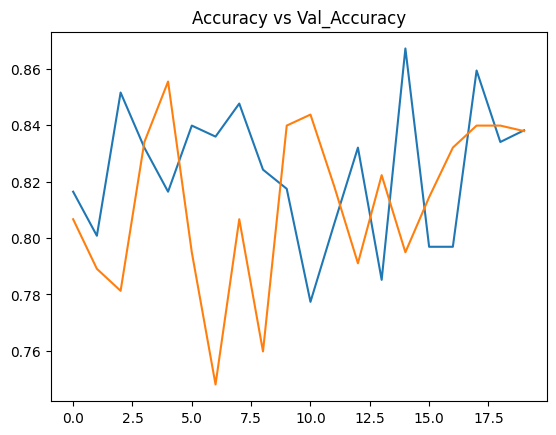

In [39]:
import matplotlib.pyplot as plt
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.title('Accuracy vs Val_Accuracy')
plt.show()

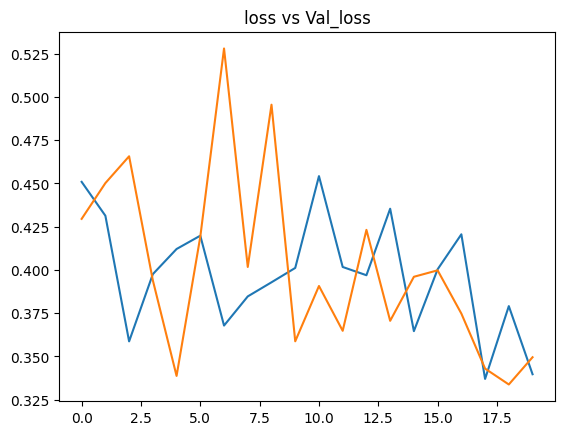

In [40]:
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.title('loss vs Val_loss')
plt.show()

In [58]:
# Model Accuracy
from keras.models import load_model
model=load_model("bestmodel.h5")


In [59]:
acc=model.evaluate_generator(test_data)[1]
print(acc*100)

83.80809426307678


In [60]:
from keras_preprocessing.image import load_img,img_to_array

In [61]:
testing_path="Dataset\Brain Tumor\Cancer (117).jpg"

img_load=load_img(testing_path,target_size=(224,224))

In [62]:
input_array=img_to_array(img_load)/255
input_array.shape

(224, 224, 3)

In [63]:
input_array=np.expand_dims(input_array,axis=0)

In [65]:
pred=model.predict(input_array)[0][0]

1/1 [==============================] - 0s 171ms/step


In [68]:
if(pred>=0.5):
    pred=1
else :
    pred=0    

In [69]:
pred

0

0--> Brain Tumour 
1--> Healthy

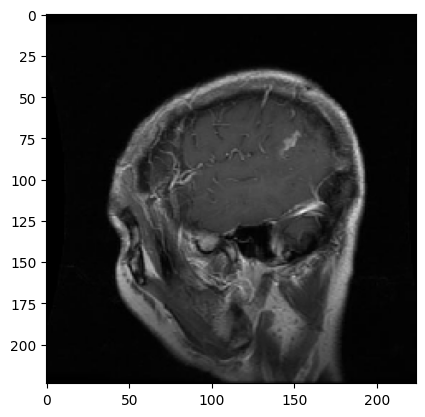

In [71]:
plt.imshow(img_load)
plt.show()

In [72]:
#Transfer Learning
import  numpy as np
import matplotlib.pyplot as plt
from keras.layers import Flatten,Dense
from keras.models import Model,load_model
from keras.applications.mobilenet import MobileNet,preprocess_input




In [73]:
def preprocessingImages_transfer(path):
 """
 input : Path
 output :Preprocessed images
 
 """
 image_data=ImageDataGenerator(zoom_range=0.2,shear_range=0.2,preprocessing_function=preprocess_input, horizontal_flip=True)
 image=image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')

 return image

In [74]:
path='train'
train_data_transfer=preprocessingImages_transfer(path)

Found 3153 images belonging to 2 classes.


In [75]:
def preprocessingImages_validate_transfer(path):
 """
 input : Path
 output :Preprocessed images
 
 """
 image_data=ImageDataGenerator(preprocessing_function=preprocess_input)
 image=image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')

 return image

In [76]:
test_path='test'
test_data_transfer=preprocessingImages_validate_transfer(test_path)

Found 667 images belonging to 2 classes.


In [77]:
validate_path='validation'
validation_data_transfer=preprocessingImages_validate_transfer(validate_path)

Found 667 images belonging to 2 classes.


In [78]:
base_model=MobileNet(input_shape=(224,224,3),include_top=False)

17225924/17225924 [==============================] - 4s 0us/step


In [79]:
for layers in base_model.layers:
    layers.trainable=False

In [80]:
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [83]:
X=Flatten()(base_model.output)
X=Dense(units=1, activation='sigmoid')(X)
model_transfer=Model(base_model.input,X)

In [84]:
model_transfer.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [85]:
model_transfer.compile(optimizer='rmsprop',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

In [86]:
#Early Stopping and model checkpoint
from keras.callbacks import ModelCheckpoint,EarlyStopping
#early stopping
es=EarlyStopping(monitor='val_accuracy',min_delta=0.01, patience=30,verbose=1, mode='auto')
#Model Checkpoint
mc=ModelCheckpoint(monitor='val_accuracy',filepath="./bestmodel.h5", verbose=1,save_best_only=True,mode='auto')

cd=[es,mc]

In [87]:
his_transfer=model_transfer.fit_generator(generator=train_data_transfer,steps_per_epoch=8, epochs=100,verbose=1,validation_data=validation_data_transfer,validation_steps=16,
                       callbacks=cd)

Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 7.6488 - accuracy: 0.5977
Epoch 1: val_accuracy improved from -inf to 0.82422, saving model to .\bestmodel.h5
8/8 [==============================] - 15s 2s/step - loss: 7.6488 - accuracy: 0.5977 - val_loss: 1.2878 - val_accuracy: 0.8242
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 1.1109 - accuracy: 0.8477
Epoch 2: val_accuracy did not improve from 0.82422
8/8 [==============================] - 11s 1s/step - loss: 1.1109 - accuracy: 0.8477 - val_loss: 1.1958 - val_accuracy: 0.8203
Epoch 3/100
8/8 [==============================] - ETA: 0s - loss: 1.1839 - accuracy: 0.8216
Epoch 3: val_accuracy did not improve from 0.82422
8/8 [==============================] - 11s 1s/step - loss: 1.1839 - accuracy: 0.8216 - val_loss: 6.1891 - val_accuracy: 0.5625
Epoch 4/100
8/8 [==============================] - ETA: 0s - loss: 1.8848 - accuracy: 0.8359
Epoch 4: val_accuracy improved from 0.82422 to 0.91016, savin

In [88]:
#  Transfer Model Accuracy
from keras.models import load_model
model_transfer=load_model("bestmodel.h5")


In [89]:
testing_path="D:\Internship Code Clause\Task1 Brain Tumour Detection\Dataset\Brain Tumor\Cancer (230).jpg"

img_load=load_img(testing_path,target_size=(224,224))

In [90]:
input_array=img_to_array(img_load)/255
input_array.shape

(224, 224, 3)

In [91]:
input_array=np.expand_dims(input_array,axis=0)

In [92]:
pred=model.predict(input_array)[0][0]

1/1 [==============================] - 0s 45ms/step


In [93]:
if(pred>=0.5):
    pred=1
else :
    pred=0 
print(pred)    

0


In [94]:
acc=model_transfer.evaluate_generator(test_data)[1]
print(acc*100)

95.652174949646


In [95]:
#Graphical Representation of losses
h=his_transfer.history
h.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

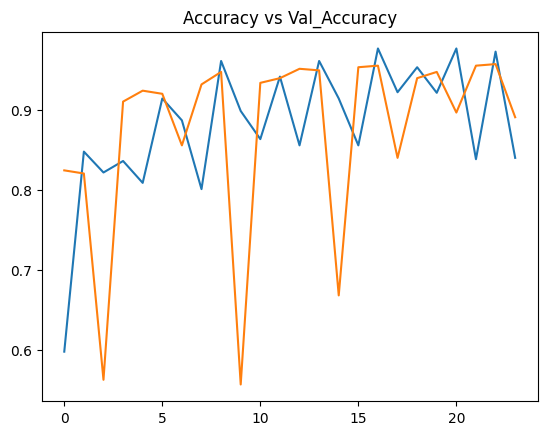

In [96]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.title('Accuracy vs Val_Accuracy')
plt.show()

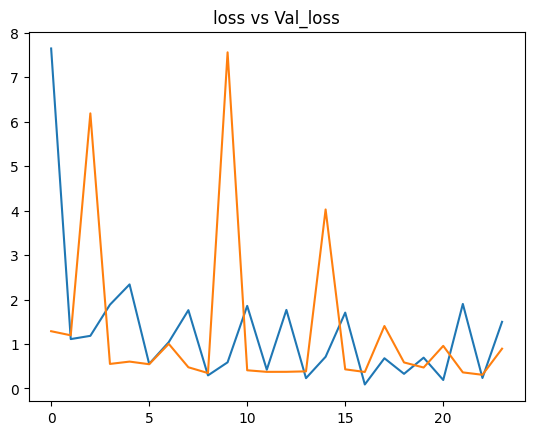

In [97]:
plt.plot(h['loss'])
plt.plot(h['val_loss'])
plt.title('loss vs Val_loss')
plt.show()

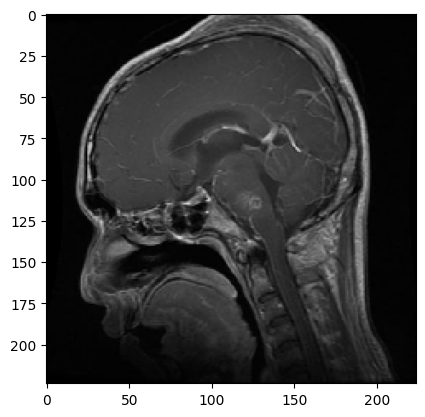

In [98]:
plt.imshow(img_load)
plt.show()

In [99]:
if pred==0:
    pred='Brain Tumour'
else:
    pred='Healthy'

        

In [100]:
print(pred)

Brain Tumour


Hence, the model is making correct predictions and is giving 95.6%. The accuracy significantly increased by the use of Transfer Learning.